<a href="https://colab.research.google.com/github/Anshikasingla114/WEATHER-ANALYSIS-PROJECT/blob/main/projectclg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Define column names (manually, since raw data may not be well-formatted)
columns = [
    "STATION", "NAME", "DATE", "ACMH", "ACSH", "AWND", "FMTM", "PGTM", "PRCP", "SNOW", "SNWD",
    "TAVG", "TMAX", "TMIN", "TSUN", "WDF1", "WDF2", "WDF5", "WDFG", "WDFM", "WESD", "WSF1",
    "WSF2", "WSF5", "WSFG", "WSFM", "WT01", "WT02", "WT03", "WT04", "WT05", "WT06", "WT07",
    "WT08", "WT09", "WT11", "WT13", "WT14", "WT15", "WT16", "WT17", "WT18", "WT21", "WT22", "WV01"
]

# Read CSV file with correct parsing (remove extra spaces)
df = pd.read_csv("raw_data.csv", names=columns, skiprows=1)  # Skip first row if it's a duplicate header

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Convert 'DATE' to proper datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Remove extra spaces from all string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convert numerical columns to proper types
num_cols = ["ACMH", "ACSH", "AWND", "PRCP", "SNOW", "SNWD", "TAVG", "TMAX", "TMIN", "TSUN", "WSF1", "WSF2", "WSF5", "WSFG"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values with 0 or appropriate default values
df.fillna(0, inplace=True)

# Save the cleaned data to an Excel file
df.to_excel("formatted_data.xlsx", index=False)

print("Excel file saved successfully with formatted data!")

<ipython-input-2-c6e353b2be06>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Excel file saved successfully with formatted data!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

# Read the data (assuming it's in a CSV file)
# If you're reading from a string, you might need to use StringIO
df = pd.read_csv('raw_data.csv')

# List of columns to keep (relevant weather features)
columns_to_keep = [
    'DATE',      # Date of observation
    'PRCP',      # Precipitation
    'TMAX',      # Maximum temperature
    'TMIN',      # Minimum temperature
]

# Drop all columns except the ones we want to keep
df_cleaned = df[columns_to_keep].copy()

# Data cleaning steps
def clean_data(df):
    # Convert DATE to datetime
    df['DATE'] = pd.to_datetime(df['DATE'])

    # Convert numeric columns to float and handle missing values
    numeric_columns = ['PRCP', 'TMAX', 'TMIN', ]

    for col in numeric_columns:
        # Remove extra spaces and convert to numeric
        df[col] = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')

        # Handle missing values - replace with median for that column
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

    # Extract additional features from DATE
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month
    df['DAY'] = df['DATE'].dt.day

    # Drop the original DATE column if not needed for ML
    df = df.drop('DATE', axis=1)

    return df

# Apply cleaning function
df_cleaned = clean_data(df_cleaned)

# Check for any remaining NaN values
print("Missing values in each column:")
print(df_cleaned.isnull().sum())

# Basic statistics of the cleaned data
print("\nBasic statistics:")
print(df_cleaned.describe())

# Optional: Remove outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal to numeric columns
numeric_columns = ['PRCP','TMAX', 'TMIN',]
df_cleaned = remove_outliers(df_cleaned, numeric_columns)

# Save the cleaned data
df_cleaned.to_csv('cleaned_raw_data.csv', index=False)

# Display first few rows of cleaned data
print("\nFirst few rows of cleaned data:")
print(df_cleaned.head())

# Display data info
print("\nData Info:")
print(df_cleaned.info())

Missing values in each column:
PRCP     0
TMAX     0
TMIN     0
YEAR     0
MONTH    0
DAY      0
dtype: int64

Basic statistics:
               PRCP          TMAX          TMIN          YEAR         MONTH  \
count  19287.000000  19287.000000  19287.000000  19287.000000  19287.000000   
mean       0.117869     61.820086     47.535283   1995.904288      6.505418   
std        0.330974     17.410481     16.418437     15.243656      3.442655   
min        0.000000      8.000000     -2.000000   1970.000000      1.000000   
25%        0.000000     48.000000     35.000000   1983.000000      4.000000   
50%        0.000000     62.000000     48.000000   1996.000000      7.000000   
75%        0.040000     77.000000     62.000000   2009.000000      9.000000   
max        7.800000    103.000000     82.000000   2022.000000     12.000000   

                DAY  
count  19287.000000  
mean      15.723804  
std        8.798845  
min        1.000000  
25%        8.000000  
50%       16.000000  
75%  

<ipython-input-3-5d5d75518bae>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
<ipython-input-3-5d5d75518bae>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Model Performance:
Mean Squared Error: 24.29
R-squared Score: 0.93

Feature Coefficients:
MONTH: -0.1285
PRCP: -39.7833
TMIN: 1.0350
Intercept: 14.2949


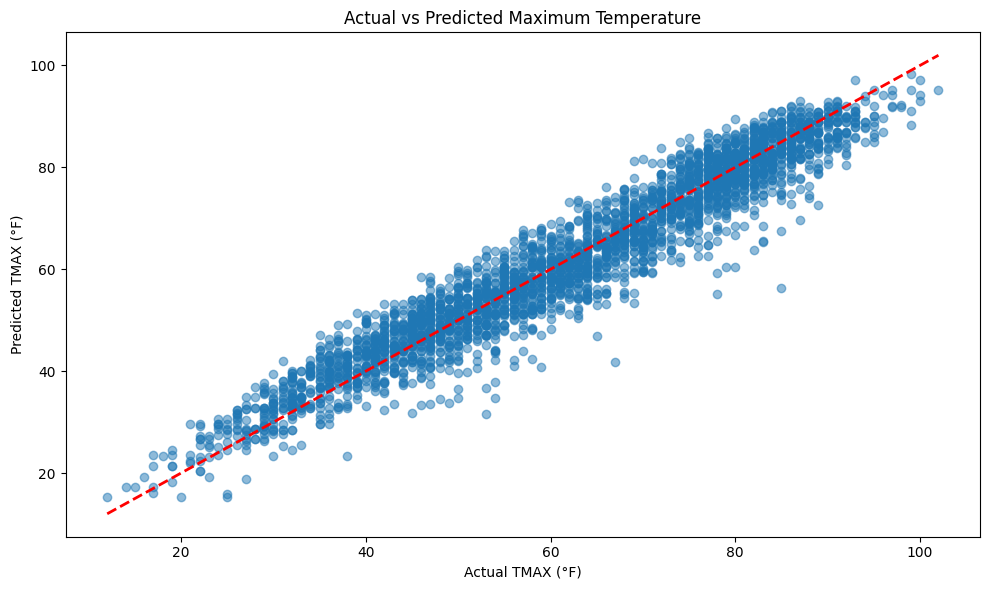

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

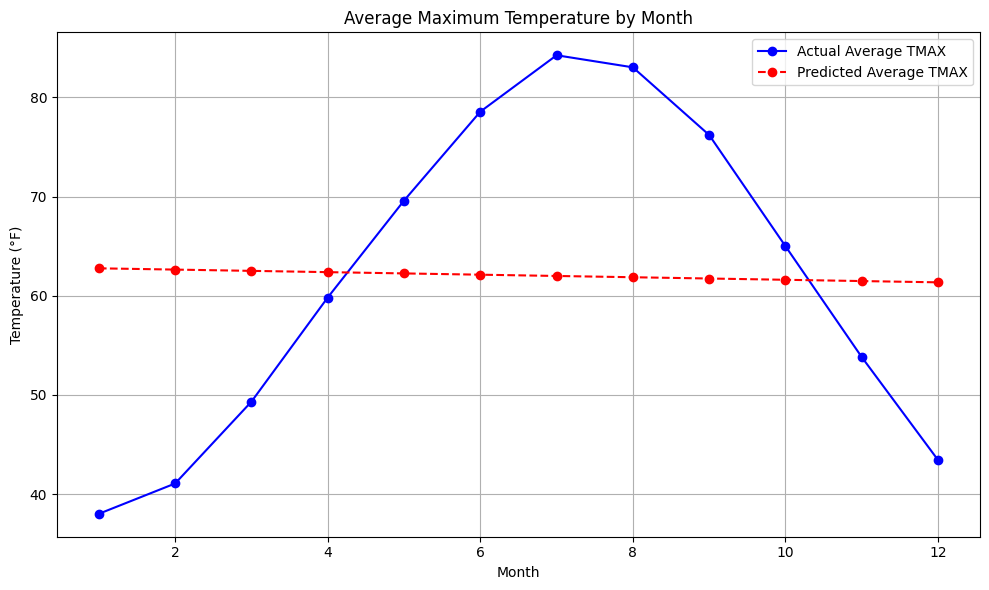

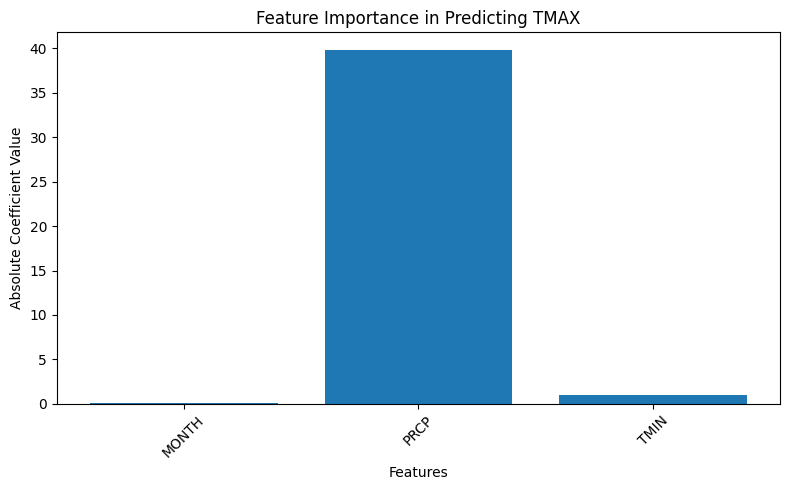

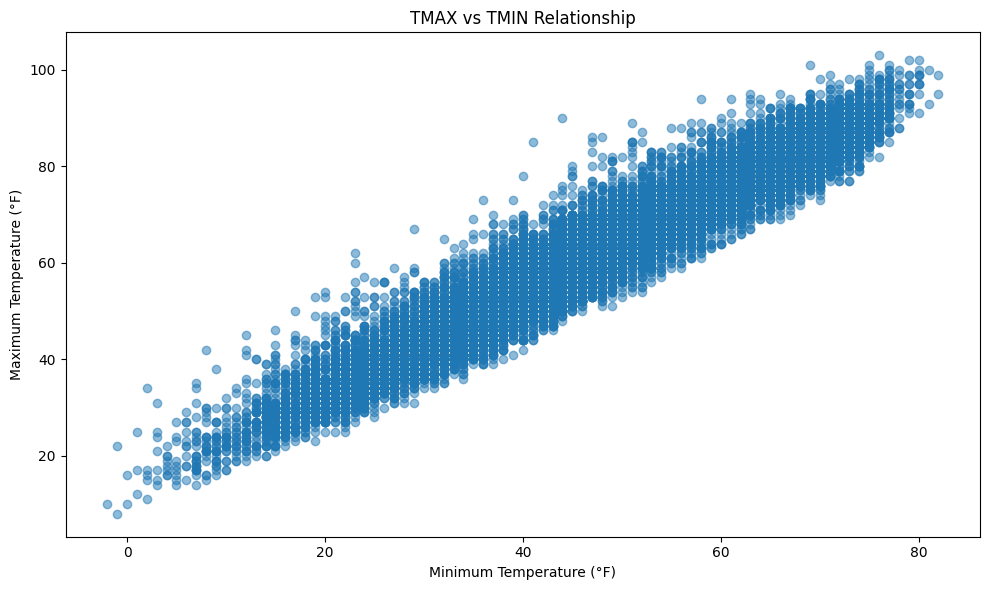

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_raw_data.csv')

# Prepare features (X) and target (y)
# Using MONTH, PRCP, and TMIN to predict TMAX
features = ['MONTH', 'PRCP', 'TMIN']
X = df[features]
y = df['TMAX']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Print coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Visualize actual vs predicted temperatures
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual TMAX (°F)')
plt.ylabel('Predicted TMAX (°F)')
plt.title('Actual vs Predicted Maximum Temperature')
plt.tight_layout()
plt.show()

# Visualize temperature trend by month
monthly_avg = df.groupby('MONTH')['TMAX'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, 'b-o', label='Actual Average TMAX')

# Generate predictions for each month using average PRCP and TMIN
monthly_pred = []
for month in range(1, 13):
    avg_features = df[features].mean()
    avg_features['MONTH'] = month
    pred = model.predict([avg_features])[0]
    monthly_pred.append(pred)

plt.plot(range(1, 13), monthly_pred, 'r--o', label='Predicted Average TMAX')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.title('Average Maximum Temperature by Month')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature importance visualization
plt.figure(figsize=(8, 5))
coef_abs = np.abs(model.coef_)
plt.bar(features, coef_abs)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance in Predicting TMAX')
plt.tight_layout()
plt.show()

# Additional visualization: TMAX vs TMIN
plt.figure(figsize=(10, 6))
plt.scatter(df['TMIN'], df['TMAX'], alpha=0.5)
plt.xlabel('Minimum Temperature (°F)')
plt.ylabel('Maximum Temperature (°F)')
plt.title('TMAX vs TMIN Relationship')
plt.tight_layout()
plt.show()

KNN Model Performance:
Mean Squared Error: 25.82
R-squared Score: 0.92


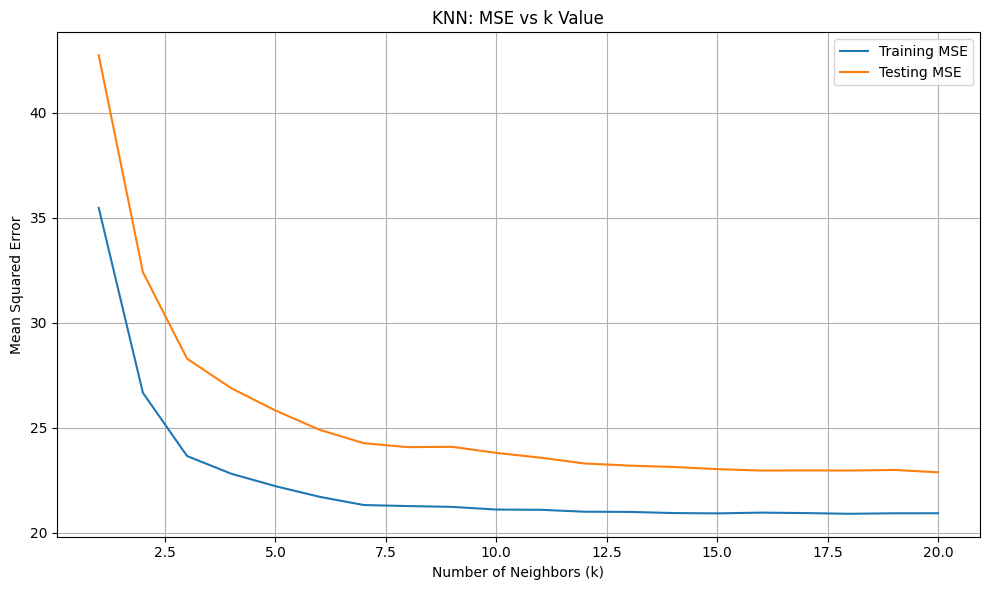

Best k value: 20

Best KNN Model (k=20) Performance:
Mean Squared Error: 22.88
R-squared Score: 0.93


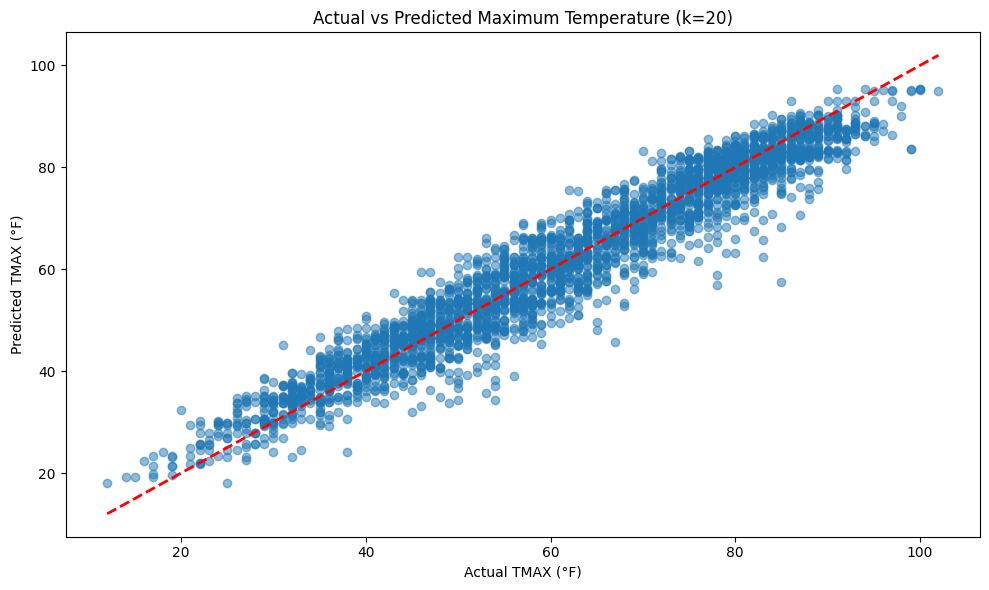

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

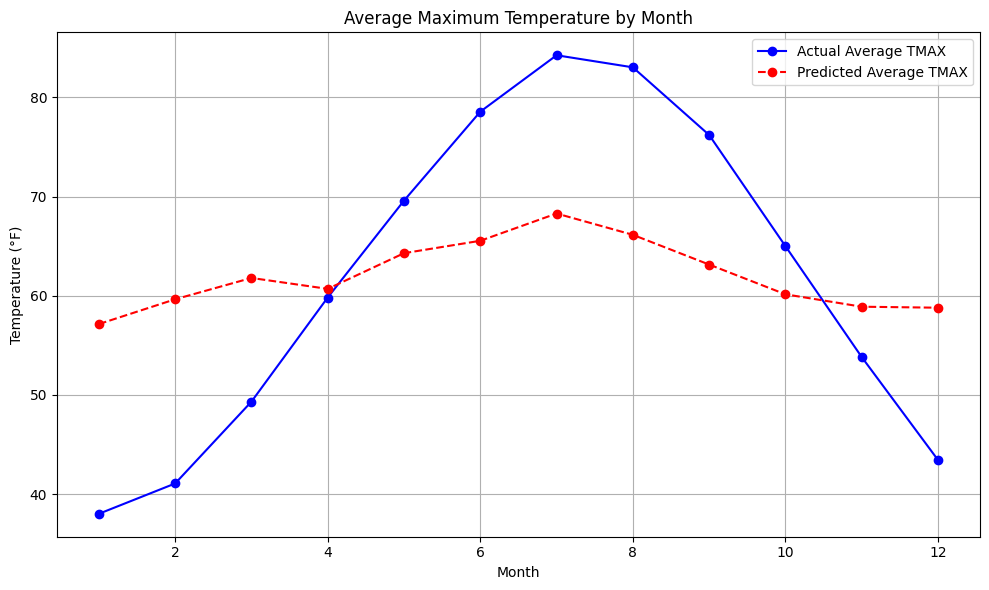

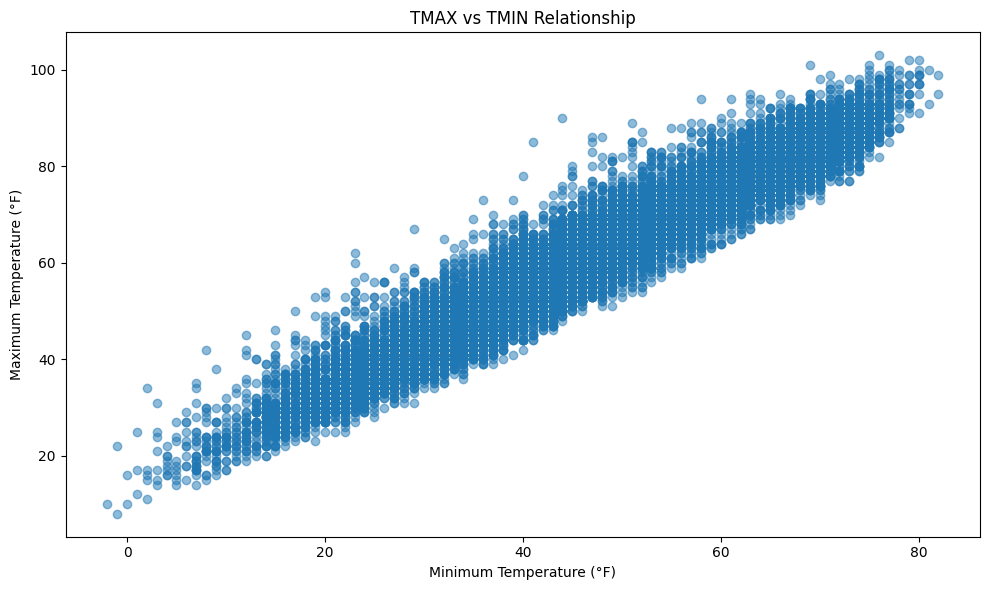

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_raw_data.csv')

# Prepare features (X) and target (y)
# Using MONTH, PRCP, and TMIN to predict TMAX
features = ['MONTH', 'PRCP', 'TMIN']
X = df[features]
y = df['TMAX']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
# Using k=5 as a starting point; you can tune this parameter
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("KNN Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Optimize k value
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_pred = knn.predict(X_train_scaled)
    test_pred = knn.predict(X_test_scaled)
    train_scores.append(mean_squared_error(y_train, train_pred))
    test_scores.append(mean_squared_error(y_test, test_pred))

# Plot k optimization
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Training MSE')
plt.plot(k_values, test_scores, label='Testing MSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('KNN: MSE vs k Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Use the best k value (minimum test MSE)
best_k = k_values[np.argmin(test_scores)]
print(f"Best k value: {best_k}")

# Retrain with best k
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

# Evaluate best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nBest KNN Model (k={best_k}) Performance:")
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R-squared Score: {r2_best:.2f}")

# Visualize actual vs predicted temperatures
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual TMAX (°F)')
plt.ylabel('Predicted TMAX (°F)')
plt.title(f'Actual vs Predicted Maximum Temperature (k={best_k})')
plt.tight_layout()
plt.show()

# Visualize temperature trend by month
monthly_avg = df.groupby('MONTH')['TMAX'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, 'b-o', label='Actual Average TMAX')

# Generate predictions for each month using average PRCP and TMIN
monthly_pred = []
for month in range(1, 13):
    avg_features = df[features].mean()
    avg_features['MONTH'] = month
    scaled_features = scaler.transform([avg_features])
    pred = knn_best.predict(scaled_features)[0]
    monthly_pred.append(pred)

plt.plot(range(1, 13), monthly_pred, 'r--o', label='Predicted Average TMAX')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.title('Average Maximum Temperature by Month')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional visualization: TMAX vs TMIN
plt.figure(figsize=(10, 6))
plt.scatter(df['TMIN'], df['TMAX'], alpha=0.5)
plt.xlabel('Minimum Temperature (°F)')
plt.ylabel('Maximum Temperature (°F)')
plt.title('TMAX vs TMIN Relationship')
plt.tight_layout()
plt.show()

Decision Tree Model Performance:
Mean Squared Error: 24.65
R-squared Score: 0.93

Feature Importance:
MONTH: 0.0014
PRCP: 0.0018
TMIN: 0.9968


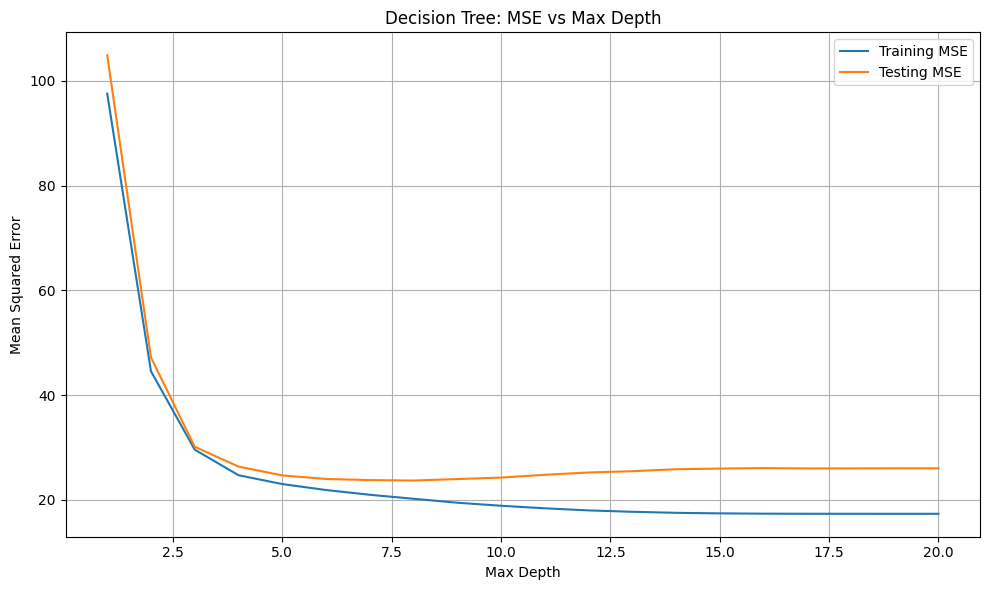

Best max_depth value: 8

Best Decision Tree Model (max_depth=8) Performance:
Mean Squared Error: 23.67
R-squared Score: 0.93


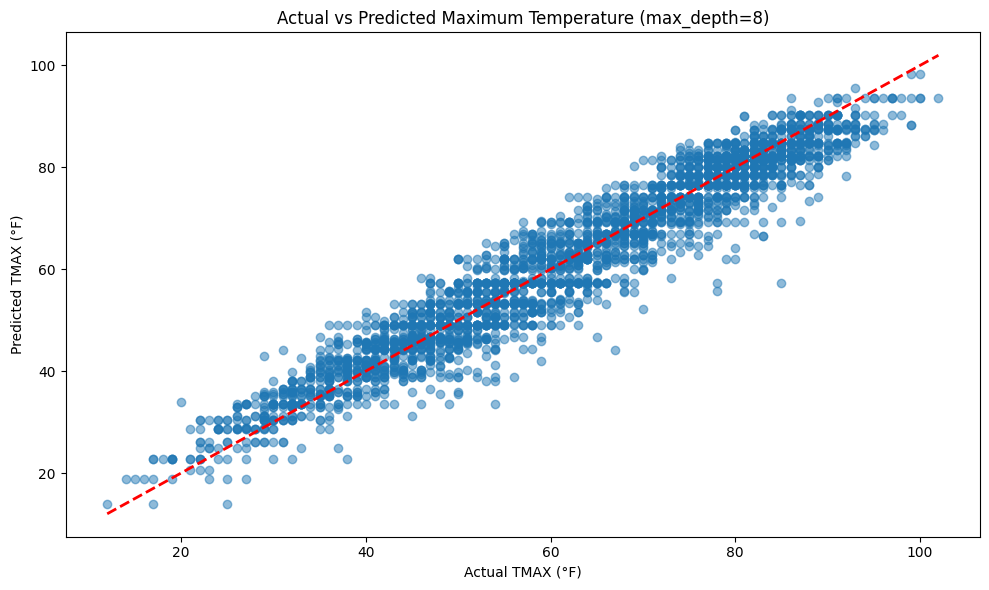

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

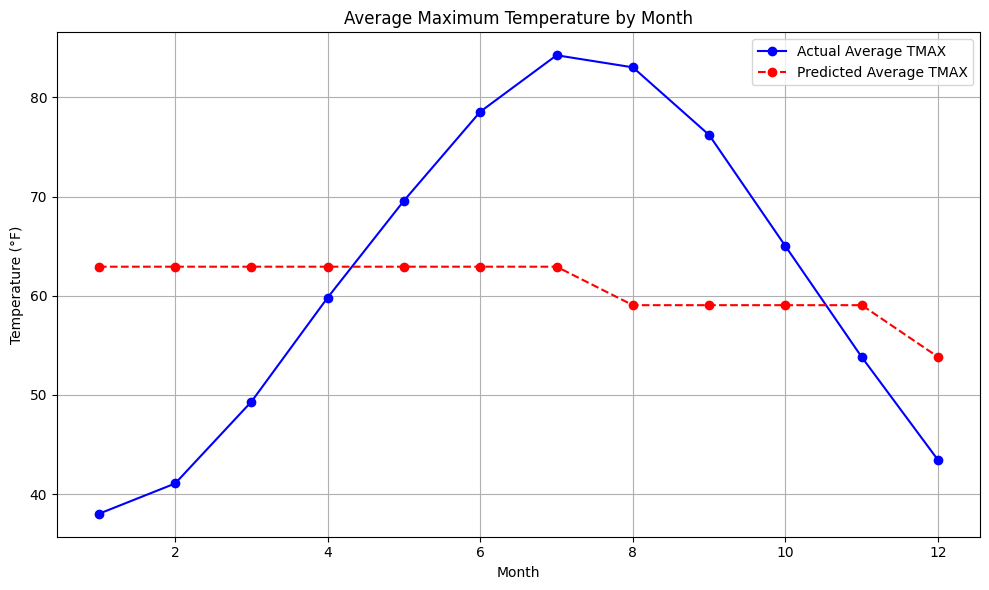

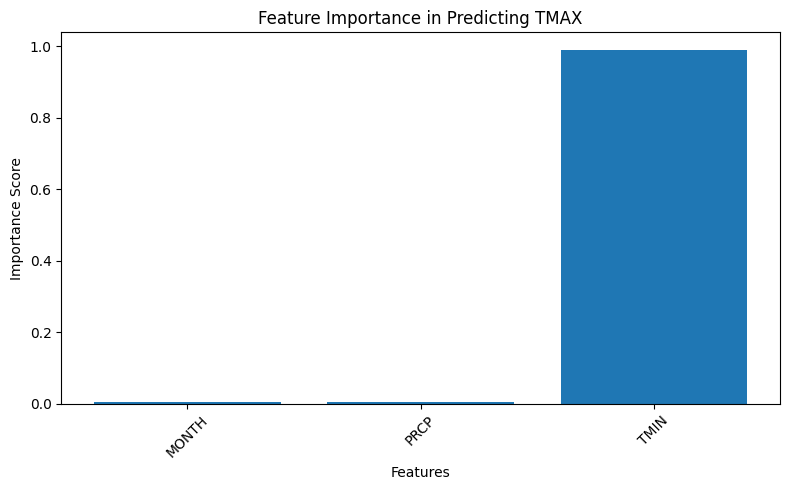

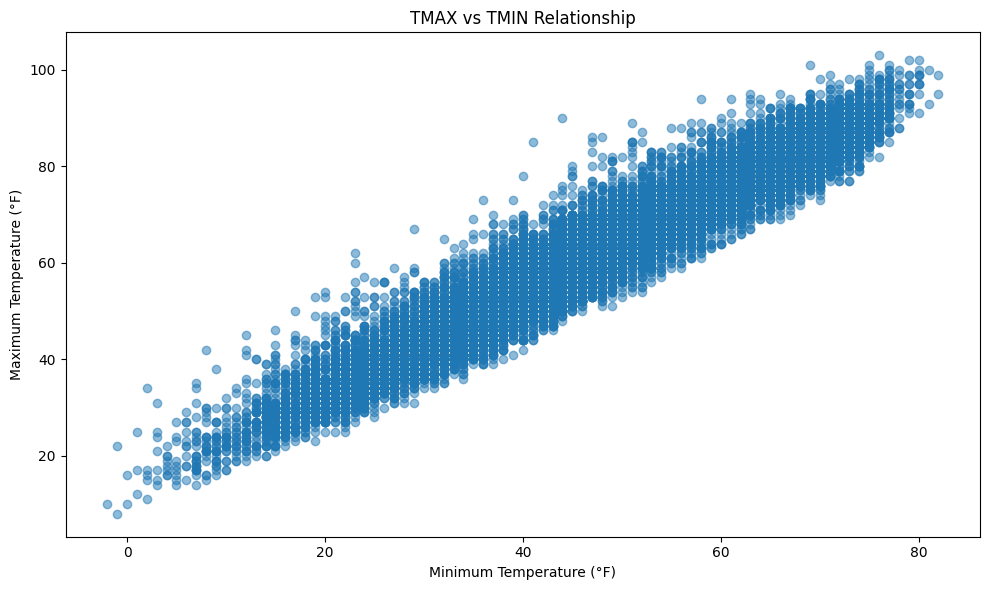

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the cleaned data
df = pd.read_csv('cleaned_raw_data.csv')

# Prepare features (X) and target (y)
# Using MONTH, PRCP, and TMIN to predict TMAX
features = ['MONTH', 'PRCP', 'TMIN']
X = df[features]
y = df['TMAX']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limiting depth to prevent overfitting
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Feature importance
print("\nFeature Importance:")
for feature, importance in zip(features, dt.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Optimize max_depth
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    train_scores.append(mean_squared_error(y_train, train_pred))
    test_scores.append(mean_squared_error(y_test, test_pred))

# Plot depth optimization
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Training MSE')
plt.plot(depths, test_scores, label='Testing MSE')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree: MSE vs Max Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Use the best depth (minimum test MSE)
best_depth = depths[np.argmin(test_scores)]
print(f"Best max_depth value: {best_depth}")

# Retrain with best depth
dt_best = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
dt_best.fit(X_train, y_train)
y_pred_best = dt_best.predict(X_test)

# Evaluate best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nBest Decision Tree Model (max_depth={best_depth}) Performance:")
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R-squared Score: {r2_best:.2f}")

# Visualize actual vs predicted temperatures
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual TMAX (°F)')
plt.ylabel('Predicted TMAX (°F)')
plt.title(f'Actual vs Predicted Maximum Temperature (max_depth={best_depth})')
plt.tight_layout()
plt.show()

# Visualize temperature trend by month
monthly_avg = df.groupby('MONTH')['TMAX'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, 'b-o', label='Actual Average TMAX')

# Generate predictions for each month using average PRCP and TMIN
monthly_pred = []
for month in range(1, 13):
    avg_features = df[features].mean()
    avg_features['MONTH'] = month
    pred = dt_best.predict([avg_features])[0]
    monthly_pred.append(pred)

plt.plot(range(1, 13), monthly_pred, 'r--o', label='Predicted Average TMAX')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.title('Average Maximum Temperature by Month')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature importance visualization
plt.figure(figsize=(8, 5))
plt.bar(features, dt_best.feature_importances_)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance in Predicting TMAX')
plt.tight_layout()
plt.show()

# Optional: Visualize the decision tree (for smaller depth)
if best_depth <= 5:  # Only plot if tree is small enough to be readable
    plt.figure(figsize=(20, 10))
    plot_tree(dt_best, feature_names=features, filled=True, rounded=True)
    plt.title('Decision Tree Structure')
    plt.tight_layout()
    plt.show()

# Additional visualization: TMAX vs TMIN
plt.figure(figsize=(10, 6))
plt.scatter(df['TMIN'], df['TMAX'], alpha=0.5)
plt.xlabel('Minimum Temperature (°F)')
plt.ylabel('Maximum Temperature (°F)')
plt.title('TMAX vs TMIN Relationship')
plt.tight_layout()
plt.show()

Random Forest Model Performance:
Mean Squared Error: 23.00
R-squared Score: 0.93

Feature Importance:
MONTH: 0.0084
PRCP: 0.0075
TMIN: 0.9841

Best Parameters: n_estimators=200, max_depth=10
Best MSE: 22.99
Best R-squared: 0.93

Best Random Forest Model Performance:
Mean Squared Error: 22.99
R-squared Score: 0.93


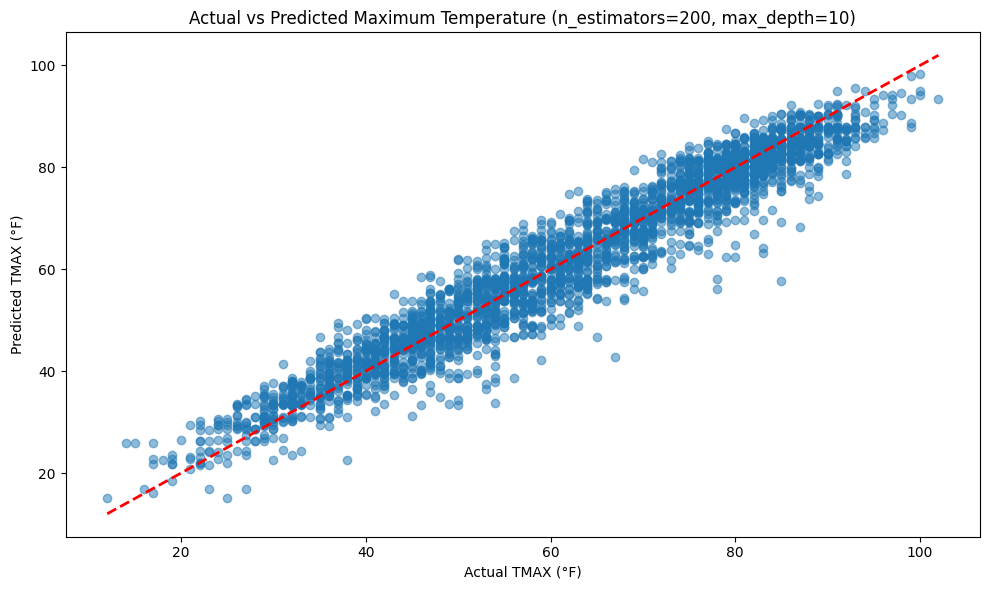

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

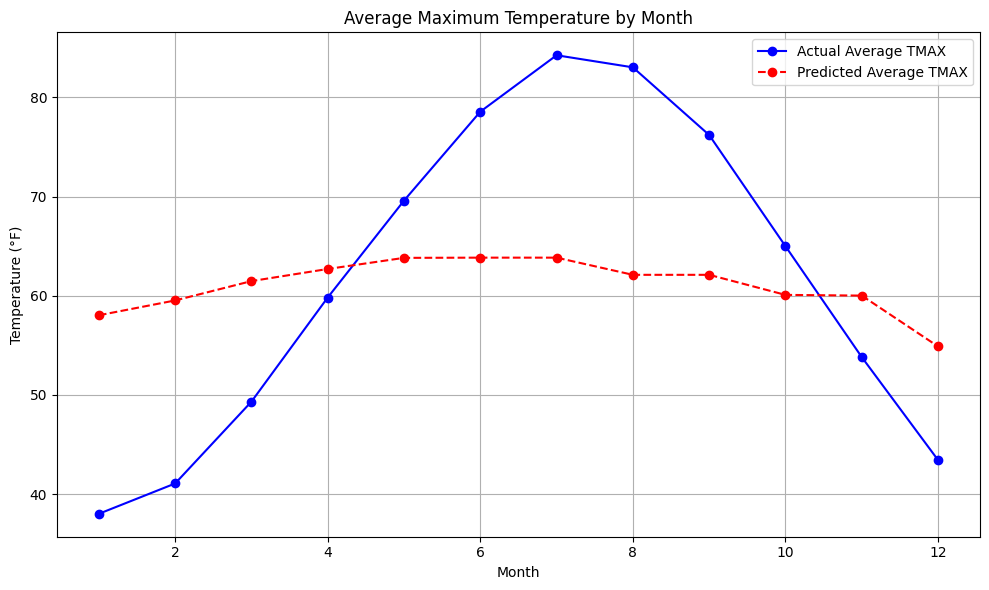

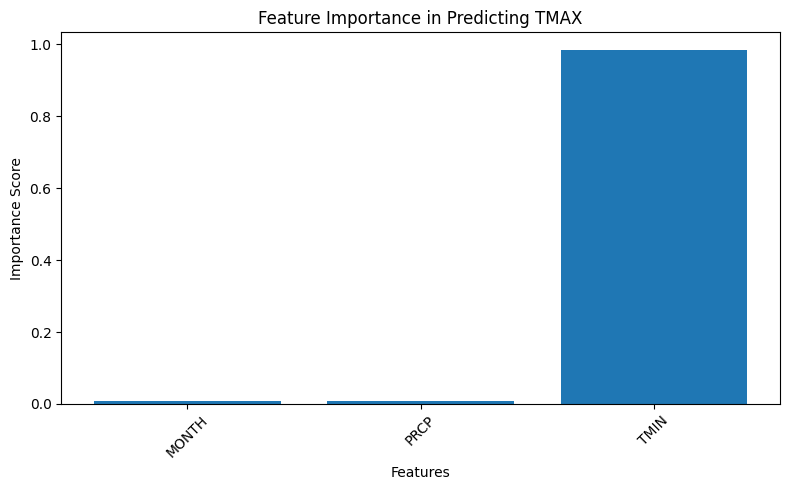

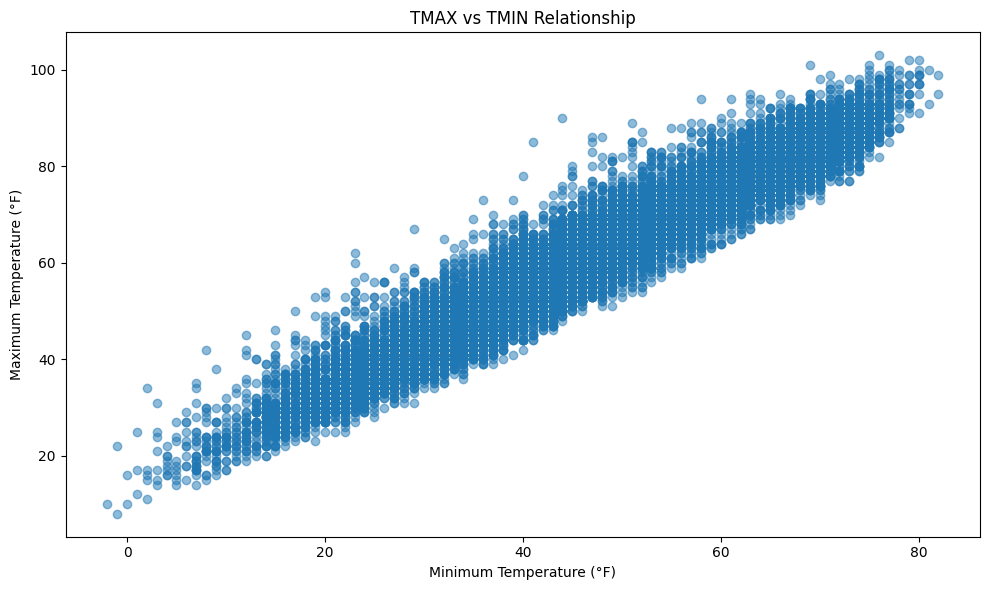

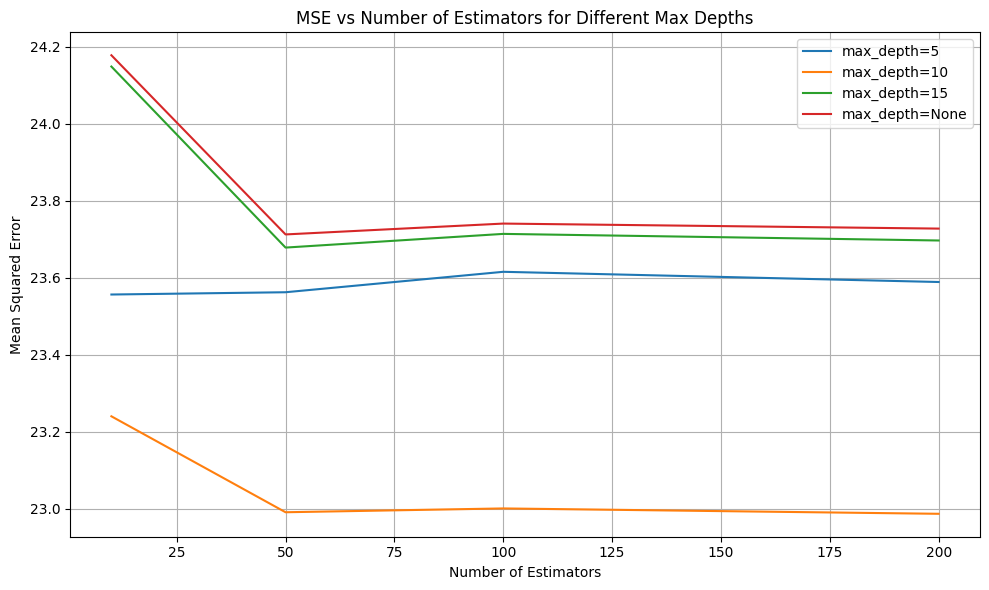

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_raw_data.csv')

# Prepare features (X) and target (y)
# Using MONTH, PRCP, and TMIN to predict TMAX
features = ['MONTH', 'PRCP', 'TMIN']
X = df[features]
y = df['TMAX']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Feature importance
print("\nFeature Importance:")
for feature, importance in zip(features, rf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Optimize n_estimators and max_depth
n_estimators_range = [10, 50, 100, 200]
max_depth_range = [5, 10, 15, None]
results = []

for n in n_estimators_range:
    for depth in max_depth_range:
        rf_temp = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42)
        rf_temp.fit(X_train, y_train)
        y_pred_temp = rf_temp.predict(X_test)
        mse_temp = mean_squared_error(y_test, y_pred_temp)
        r2_temp = r2_score(y_test, y_pred_temp)
        results.append((n, depth, mse_temp, r2_temp))

# Find best parameters
best_result = min(results, key=lambda x: x[2])  # Minimize MSE
best_n, best_depth, best_mse, best_r2 = best_result
print(f"\nBest Parameters: n_estimators={best_n}, max_depth={best_depth}")
print(f"Best MSE: {best_mse:.2f}")
print(f"Best R-squared: {best_r2:.2f}")

# Retrain with best parameters
rf_best = RandomForestRegressor(n_estimators=best_n, max_depth=best_depth, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

# Evaluate best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nBest Random Forest Model Performance:")
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R-squared Score: {r2_best:.2f}")

# Visualize actual vs predicted temperatures
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual TMAX (°F)')
plt.ylabel('Predicted TMAX (°F)')
plt.title(f'Actual vs Predicted Maximum Temperature (n_estimators={best_n}, max_depth={best_depth})')
plt.tight_layout()
plt.show()

# Visualize temperature trend by month
monthly_avg = df.groupby('MONTH')['TMAX'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, 'b-o', label='Actual Average TMAX')

# Generate predictions for each month using average PRCP and TMIN
monthly_pred = []
for month in range(1, 13):
    avg_features = df[features].mean()
    avg_features['MONTH'] = month
    pred = rf_best.predict([avg_features])[0]
    monthly_pred.append(pred)

plt.plot(range(1, 13), monthly_pred, 'r--o', label='Predicted Average TMAX')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.title('Average Maximum Temperature by Month')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature importance visualization
plt.figure(figsize=(8, 5))
plt.bar(features, rf_best.feature_importances_)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance in Predicting TMAX')
plt.tight_layout()
plt.show()

# Additional visualization: TMAX vs TMIN
plt.figure(figsize=(10, 6))
plt.scatter(df['TMIN'], df['TMAX'], alpha=0.5)
plt.xlabel('Minimum Temperature (°F)')
plt.ylabel('Maximum Temperature (°F)')
plt.title('TMAX vs TMIN Relationship')
plt.tight_layout()
plt.show()

# Optional: Parameter tuning visualization
plt.figure(figsize=(10, 6))
for depth in max_depth_range:
    mse_values = [r[2] for r in results if r[1] == depth]
    plt.plot(n_estimators_range, mse_values, label=f'max_depth={depth or "None"}')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Number of Estimators for Different Max Depths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

XGBoost Model Performance:
Mean Squared Error: 22.31
R-squared Score: 0.93

Feature Importance:
MONTH: 0.0106
PRCP: 0.0072
TMIN: 0.9822

Best Parameters: n_estimators=50, max_depth=3, learning_rate=0.3
Best MSE: 22.14
Best R-squared: 0.93

Best XGBoost Model Performance:
Mean Squared Error: 22.14
R-squared Score: 0.93


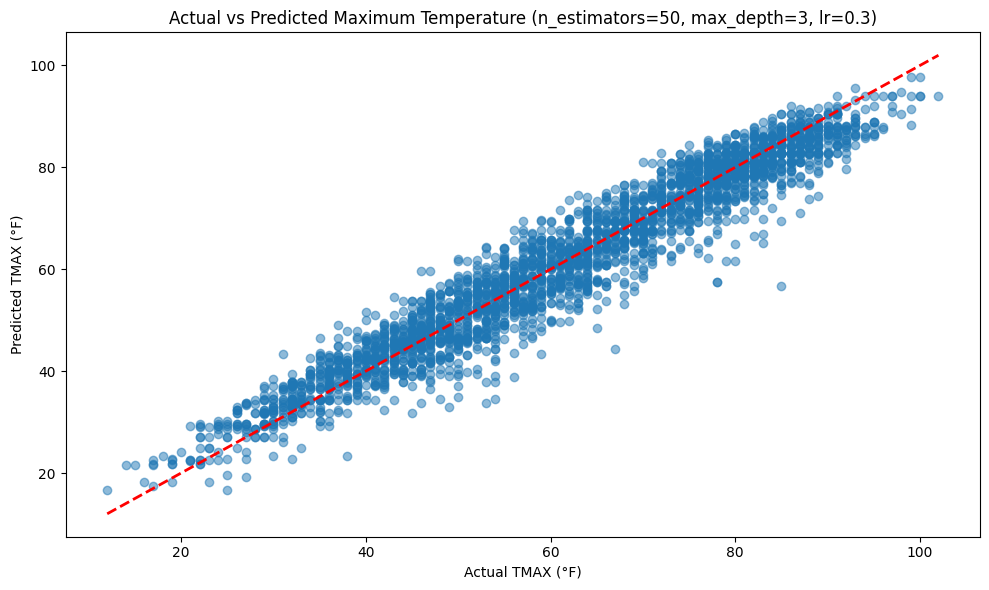

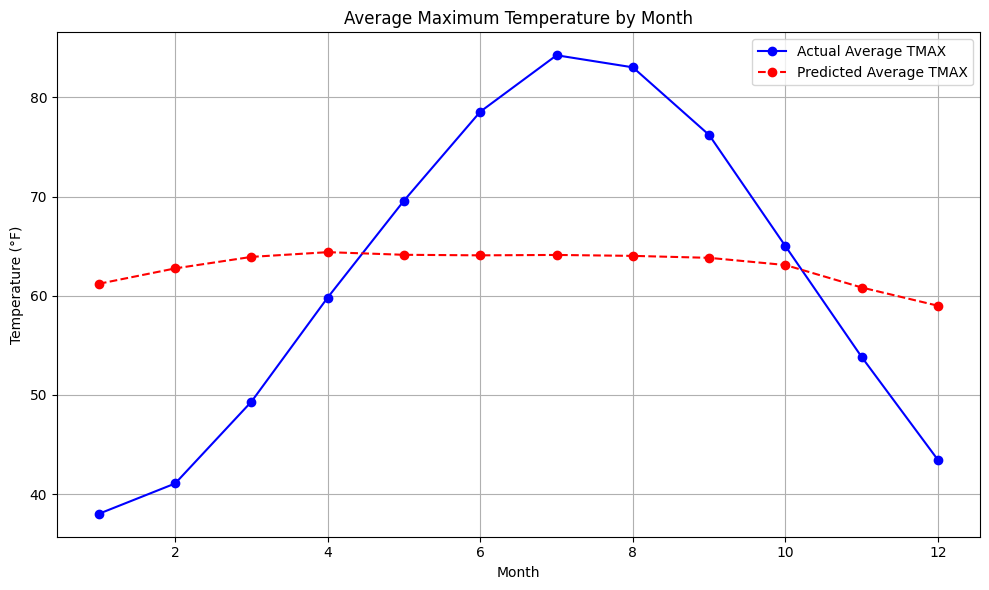

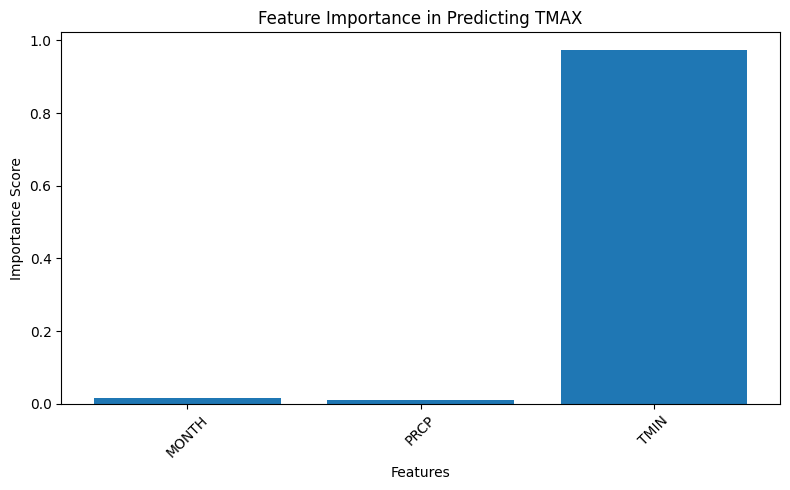

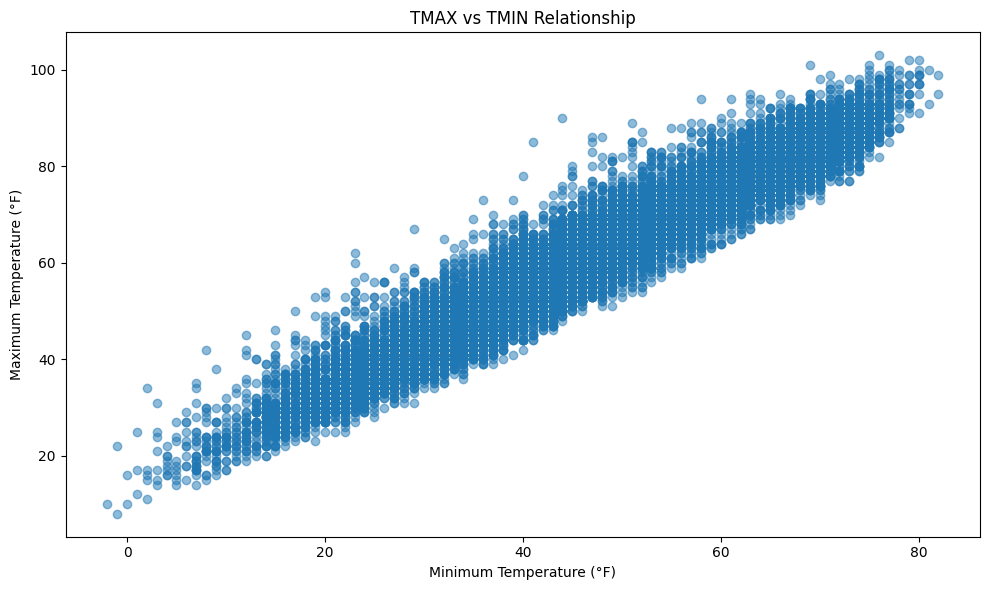

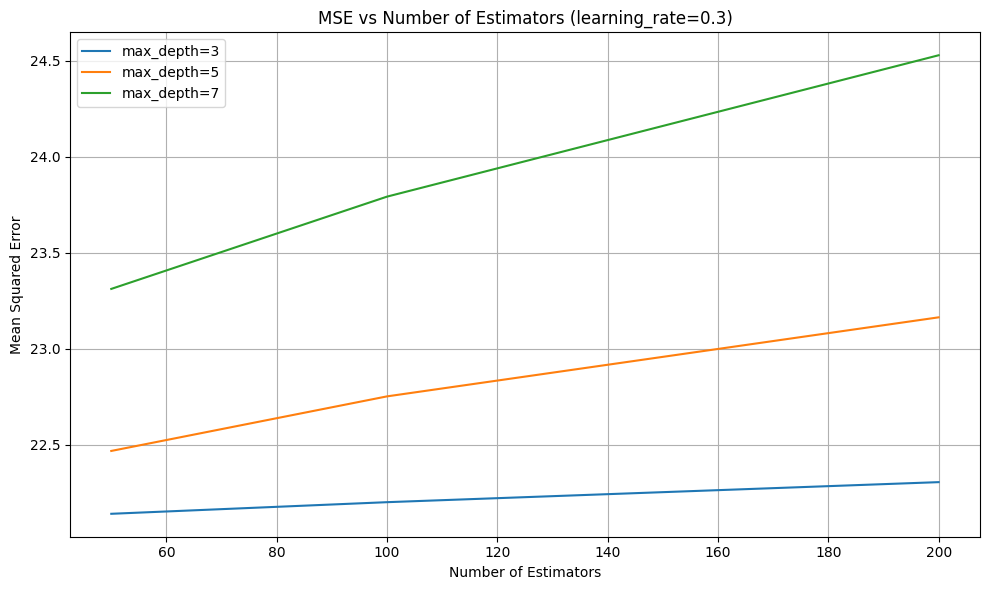

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_raw_data.csv')

# Prepare features (X) and target (y)
# Using MONTH, PRCP, and TMIN to predict TMAX
features = ['MONTH', 'PRCP', 'TMIN']
X = df[features]
y = df['TMAX']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
xgb = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Feature importance
print("\nFeature Importance:")
for feature, importance in zip(features, xgb.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Optimize hyperparameters (simple grid search)
n_estimators_range = [50, 100, 200]
max_depth_range = [3, 5, 7]
learning_rate_range = [0.01, 0.1, 0.3]
results = []

for n in n_estimators_range:
    for depth in max_depth_range:
        for lr in learning_rate_range:
            xgb_temp = XGBRegressor(
                n_estimators=n,
                max_depth=depth,
                learning_rate=lr,
                random_state=42
            )
            xgb_temp.fit(X_train, y_train)
            y_pred_temp = xgb_temp.predict(X_test)
            mse_temp = mean_squared_error(y_test, y_pred_temp)
            r2_temp = r2_score(y_test, y_pred_temp)
            results.append((n, depth, lr, mse_temp, r2_temp))

# Find best parameters
best_result = min(results, key=lambda x: x[3])  # Minimize MSE
best_n, best_depth, best_lr, best_mse, best_r2 = best_result
print(f"\nBest Parameters: n_estimators={best_n}, max_depth={best_depth}, learning_rate={best_lr}")
print(f"Best MSE: {best_mse:.2f}")
print(f"Best R-squared: {best_r2:.2f}")

# Retrain with best parameters
xgb_best = XGBRegressor(
    n_estimators=best_n,
    max_depth=best_depth,
    learning_rate=best_lr,
    random_state=42
)
xgb_best.fit(X_train, y_train)
y_pred_best = xgb_best.predict(X_test)

# Evaluate best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nBest XGBoost Model Performance:")
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R-squared Score: {r2_best:.2f}")

# Visualize actual vs predicted temperatures
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual TMAX (°F)')
plt.ylabel('Predicted TMAX (°F)')
plt.title(f'Actual vs Predicted Maximum Temperature (n_estimators={best_n}, max_depth={best_depth}, lr={best_lr})')
plt.tight_layout()
plt.show()

# Visualize temperature trend by month
monthly_avg = df.groupby('MONTH')['TMAX'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, 'b-o', label='Actual Average TMAX')

# Generate predictions for each month using average PRCP and TMIN
monthly_pred = []
for month in range(1, 13):
    avg_features = df[features].mean()
    avg_features['MONTH'] = month
    pred = xgb_best.predict([avg_features])[0]
    monthly_pred.append(pred)

plt.plot(range(1, 13), monthly_pred, 'r--o', label='Predicted Average TMAX')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.title('Average Maximum Temperature by Month')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature importance visualization
plt.figure(figsize=(8, 5))
plt.bar(features, xgb_best.feature_importances_)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance in Predicting TMAX')
plt.tight_layout()
plt.show()

# Additional visualization: TMAX vs TMIN
plt.figure(figsize=(10, 6))
plt.scatter(df['TMIN'], df['TMAX'], alpha=0.5)
plt.xlabel('Minimum Temperature (°F)')
plt.ylabel('Maximum Temperature (°F)')
plt.title('TMAX vs TMIN Relationship')
plt.tight_layout()
plt.show()

# Optional: Parameter tuning visualization (MSE vs n_estimators for different max_depths)
plt.figure(figsize=(10, 6))
for depth in max_depth_range:
    mse_values = [r[3] for r in results if r[1] == depth and r[2] == best_lr]
    plt.plot(n_estimators_range, mse_values, label=f'max_depth={depth}')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title(f'MSE vs Number of Estimators (learning_rate={best_lr})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Model Performance:
Linear Regression: MSE = 24.29, R² = 0.93
KNN: MSE = 25.82, R² = 0.92
Decision Tree: MSE = 24.65, R² = 0.93
Random Forest: MSE = 23.00, R² = 0.93
XGBoost: MSE = 22.31, R² = 0.93


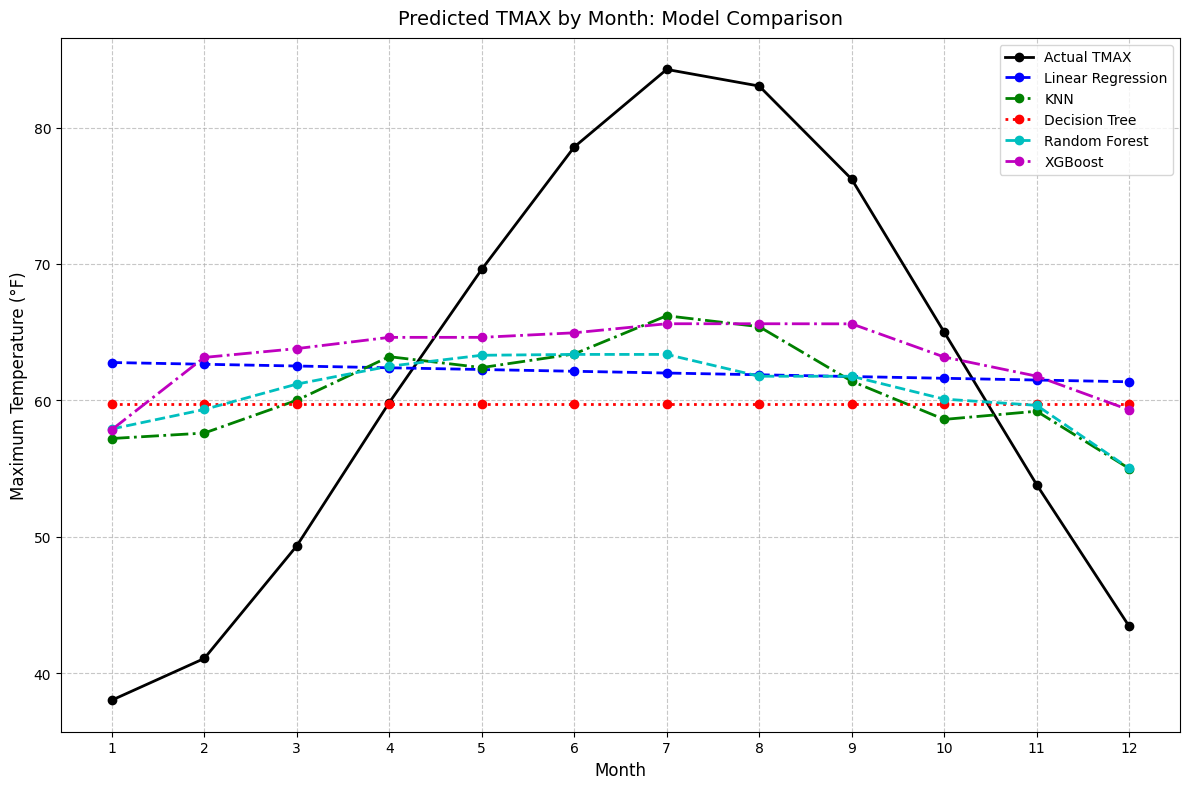

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_raw_data.csv')

# Prepare features (X) and target (y)
features = ['MONTH', 'PRCP', 'TMIN']
X = df[features]
y = df['TMAX']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train all models
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models and store predictions
predictions = {}
mse_values = {}
r2_values = {}

for name, model in models.items():
    if name == 'KNN':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    mse_values[name] = mean_squared_error(y_test, y_pred)
    r2_values[name] = r2_score(y_test, y_pred)
    predictions[name] = y_pred

# Print performance metrics
print("Model Performance:")
for name in models.keys():
    print(f"{name}: MSE = {mse_values[name]:.2f}, R² = {r2_values[name]:.2f}")

# Calculate actual average TMAX by month
monthly_avg = df.groupby('MONTH')['TMAX'].mean()

# Generate predicted TMAX by month for each model
monthly_predictions = {name: [] for name in models.keys()}
months = range(1, 13)

for month in months:
    avg_features = df[features].mean()
    avg_features['MONTH'] = month
    features_df = pd.DataFrame([avg_features])
    features_scaled = scaler.transform(features_df) if 'KNN' in models else features_df

    for name, model in models.items():
        if name == 'KNN':
            pred = model.predict(features_scaled)[0]
        else:
            pred = model.predict(features_df)[0]
        monthly_predictions[name].append(pred)

# Plot all models on a single line plot
plt.figure(figsize=(12, 8))
plt.plot(months, monthly_avg.values, 'k-', linewidth=2, label='Actual TMAX', marker='o')

# Define distinct line styles and colors for each model
styles = ['--', '-.', ':', '--', '-.']
colors = ['b', 'g', 'r', 'c', 'm']

for i, (name, preds) in enumerate(monthly_predictions.items()):
    plt.plot(months, preds, linestyle=styles[i], color=colors[i], linewidth=2, label=name, marker='o')

# Customize the plot
plt.xlabel('Month', fontsize=12)
plt.ylabel('Maximum Temperature (°F)', fontsize=12)
plt.title('Predicted TMAX by Month: Model Comparison', fontsize=14, pad=10)
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(months)
plt.tight_layout()

# Show the plot
plt.show()